In [1]:
using Pkg
Pkg.activate("CT")
using Revise
using CT

  Activating project at `/mnt/d/Rutgers/control_transition/CT`


In [2]:
CT.greet()

Hello World! How are 1?

In [4]:
using Random
using ITensors
using Plots
using Statistics
using BenchmarkTools



In [128]:
# i=0
# ct_f=CT.CT_MPS(L=20,seed=3,folded=true,store_op=false,store_vec=false,ancilla=1)
# ct=CT.CT_MPS(L=4,seed=3,folded=true,store_op=true,store_vec=true,ancilla=1,x0=1//2^4)
ct=CT.CT_MPS(L=10,seed=3,folded=false,store_op=false,store_vec=false,ancilla=1,_maxdim=6)


# 

CT.CT_MPS(4, true, true, false, 3, nothing, nothing, 1//16, Set(Rational{Int64}[2//3, 1//3]), 1.0e-10, 1, true, MersenneTwister(3), MersenneTwister(3), MersenneTwister(3), Index{Int64}[(dim=2|id=182|"Qubit,Site,n=1"), (dim=2|id=942|"Qubit,Site,n=2"), (dim=2|id=571|"Qubit,Site,n=3"), (dim=2|id=310|"Qubit,Site,n=4"), (dim=2|id=248|"Qubit,Site,n=5")], [2, 4, 5, 3, 1], [5, 1, 4, 2, 3], [1, 2, 3, 4], 10, 1.0e-10, MPS
[1] ((dim=2|id=182|"Qubit,Site,n=1"), (dim=1|id=231|"Link,l=1"))
[2] ((dim=1|id=231|"Link,l=1"), (dim=2|id=942|"Qubit,Site,n=2"), (dim=1|id=498|"Link,l=2"))
[3] ((dim=1|id=498|"Link,l=2"), (dim=2|id=571|"Qubit,Site,n=3"), (dim=1|id=833|"Link,l=3"))
[4] ((dim=1|id=833|"Link,l=3"), (dim=2|id=310|"Qubit,Site,n=4"), (dim=1|id=704|"Link,l=4"))
[5] ((dim=1|id=704|"Link,l=4"), (dim=2|id=248|"Qubit,Site,n=5"))
, MPS[], Vector{Any}[], Union{Nothing, MPO}[MPO
[1] ((dim=2|id=182|"Qubit,Site,n=1")', (dim=2|id=182|"Qubit,Site,n=1"), (dim=2|id=876|"Link,l=1"))
[2] ((dim=2|id=942|"Qubit,Site,

In [70]:
i=1
for idx in 1:div(ct.L^2,4)
    # for idx in 1:1
    println(idx)
    i=CT.random_control!(ct,i,1)
    # ram_usage[idx+1]=Base.summarysize(ct.mps)
    # max_bond[idx+1]=CT.max_bond_dim(ct.mps)
end

1
2
3
4


In [71]:
CT.ZZ(ct)

0.9999999999999998

In [72]:
CT.Z(ct)

0.0

In [73]:
CT.order_parameter(ct)

0.9999999999999998

In [80]:
CT.mps_element(ct.mps,"01011"),CT.mps_element(ct.mps,"10101")

(-5.955012514003781e-19, -0.0)

In [161]:
@time CT.S!(ct,1,MersenneTwister(1),builtin=true)

  0.003949 seconds (3.37 k allocations: 850.664 KiB)


In [162]:
ct_1=CT.CT_MPS(L=10,seed=3,folded=true,store_op=true,store_vec=true,ancilla=0)

CT.CT_MPS(10, true, true, false, 3, nothing, nothing, nothing, Set(Rational{Int64}[2//3, 1//3]), 1.0e-10, 0, true, MersenneTwister(3, (0, 2004, 1002, 297)), MersenneTwister(3, (0, 2004, 1002, 297)), MersenneTwister(3, (0, 2004, 1002, 297)), Index{Int64}[(dim=2|id=592|"Qubit,Site,n=1"), (dim=2|id=297|"Qubit,Site,n=2"), (dim=2|id=694|"Qubit,Site,n=3"), (dim=2|id=81|"Qubit,Site,n=4"), (dim=2|id=643|"Qubit,Site,n=5"), (dim=2|id=971|"Qubit,Site,n=6"), (dim=2|id=847|"Qubit,Site,n=7"), (dim=2|id=502|"Qubit,Site,n=8"), (dim=2|id=724|"Qubit,Site,n=9"), (dim=2|id=653|"Qubit,Site,n=10")], [1, 3, 5, 7, 9, 10, 8, 6, 4, 2], [1, 10, 2, 9, 3, 8, 4, 7, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 10, 1.0e-10, MPS
[1] ((dim=2|id=592|"Qubit,Site,n=1"), (dim=10|id=662|"Link,l=1"))
[2] ((dim=10|id=662|"Link,l=1"), (dim=2|id=297|"Qubit,Site,n=2"), (dim=10|id=393|"Link,l=2"))
[3] ((dim=10|id=393|"Link,l=2"), (dim=2|id=694|"Qubit,Site,n=3"), (dim=10|id=301|"Link,l=3"))
[4] ((dim=10|id=301|"Link,l=3"), (dim=2|id=81

In [163]:
@time CT.S!(ct_1,1,MersenneTwister(1),builtin=false)

  0.001401 seconds (956 allocations: 269.531 KiB)


In [ ]:
Array(CT.mps_to_tensor(ct_1.mps),ct_1.qubit_site)

In [100]:
norm(array(prod(ct.mps))-array(prod(ct_1.mps)))

4.511147449818972e-16

In [169]:
os=OpSum()

sum(

)

In [195]:
function ITensors.op(::OpName"NOT",::SiteType"Qubit",s::Index) 
    mat = [0 1.; 1. 0]
    return itensor(mat,s,s')
end
function ITensors.op(::OpName"Iden",::SiteType"Qubit",s::Index) 
    mat = [1. 0; 0 1.]
    return itensor(mat,s,s')
end

In [182]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [280]:
os=OpSum()
os+=("NOT",1)
os+=("NOT",2)
os+=("NOT",3)
os+=("NOT",4)

sum(
  1.0 NOT(1,)
  1.0 NOT(2,)
  1.0 NOT(3,)
  1.0 NOT(4,)
)

In [286]:
tuple(([("X",i) for i in 1:4]...)...)

("X", 1, "X", 2, "X", 3, "X", 4)

In [239]:
os=OpSum()
os.+=("NOT",1,"NOT",2)
os.+=("NOT",2,"NOT",3)
os.+=("NOT",3,"NOT",4)

sum(
  1.0 NOT(1,) NOT(2,)
  1.0 NOT(2,) NOT(3,)
  1.0 NOT(3,) NOT(4,)
)

In [ ]:
os=ops([("NOT",1),("NOT",2),("Iden",3),("Iden",4)],ct.qubit_site)

In [ ]:
os=ops([("NOT", n) for n in 1:4],ct.qubit_site)

In [588]:
A1=OpSum()
A1+=tuple(([((i==1) ? "X" : "S+",i) for i in 1:ct.L]...)...)
for j in 2:ct.L
    A1+=tuple(([((i==j) ? "S-" : "S+",i) for i in j:ct.L]...)...)
end

In [601]:
[1,2] .>>1

2-element Vector{Int64}:
 0
 1

In [608]:
length(mpo)

4

In [609]:
z=[0,1]

2-element Vector{Int64}:
 0
 1

In [613]:
z

2-element Vector{Int64}:
 0
 1

In [620]:
z.>>=1

2-element Vector{Int64}:
 0
 1

In [632]:
z=fill(mpo,2)

2-element Vector{MPO}:
 MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))

 MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [633]:
z[1]=mpo

MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [651]:
mpos=CT.power_mpo(mpo,[3,5])

[3, 5]1:3 in [3, 5]
2:5 in [3, 5]
1:1 in [1, 2]
2:1 in [0, 1]


2-element Vector{MPO}:
 MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=591|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=3|id=305|"Link,l=2"), (dim=2|id=591|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=986|"Link,l=3"), (dim=3|id=305|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=986|"Link,l=3"))

 MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=743|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=2|id=542|"Link,l=2"), (dim=2|id=743|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=48|"Link,l=3"), (dim=2|id=542|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=48|"Link,l=3"))


In [589]:
A1

sum(
  1.0 X(1,) S+(2,) S+(3,) S+(4,)
  1.0 S-(2,) S+(3,) S+(4,)
  1.0 S-(3,) S+(4,)
  1.0 S-(4,)
)

In [590]:
mpo=MPO(A1,ct.qubit_site)

MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [599]:
1*mpo
    

MPO
[1] ((dim=3|id=131|"Link,l=1"), (dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"))
[2] ((dim=3|id=131|"Link,l=1"), (dim=3|id=787|"Link,l=2"), (dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"))
[3] ((dim=3|id=787|"Link,l=2"), (dim=3|id=495|"Link,l=3"), (dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"))
[4] ((dim=3|id=495|"Link,l=3"), (dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"))


In [596]:
mpo5=power_mpo(mpo,5)

MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=643|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=2|id=560|"Link,l=2"), (dim=2|id=643|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=717|"Link,l=3"), (dim=2|id=560|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=717|"Link,l=3"))


In [593]:
mpo3=apply(mpo,mpo,mpo)

MPO
[1] ((dim=2|id=409|"Qubit,Site,n=1")', (dim=2|id=409|"Qubit,Site,n=1"), (dim=2|id=523|"Link,l=1"))
[2] ((dim=2|id=566|"Qubit,Site,n=2")', (dim=2|id=566|"Qubit,Site,n=2"), (dim=3|id=276|"Link,l=2"), (dim=2|id=523|"Link,l=1"))
[3] ((dim=2|id=753|"Qubit,Site,n=3")', (dim=2|id=753|"Qubit,Site,n=3"), (dim=2|id=714|"Link,l=3"), (dim=3|id=276|"Link,l=2"))
[4] ((dim=2|id=999|"Qubit,Site,n=4")', (dim=2|id=999|"Qubit,Site,n=4"), (dim=2|id=714|"Link,l=3"))


In [471]:
array(mpo[3])[3,1,:,:]

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [479]:
array(mpo[1])[1,:,:]

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [36]:
CT.add1(1,ct.L,ct.phy_ram)

sum(
  1.0 X(1,) S+(2,) S+(3,) S+(4,)
  1.0 S-(2,) S+(3,) S+(4,)
  1.0 S-(3,) S+(4,)
  1.0 S-(4,)
)

In [39]:
CT.add1(4,ct.L,ct.phy_ram)

sum(
  1.0 S+(1,) S+(2,) S+(3,) X(4,)
  1.0 S-(1,) S+(2,) S+(3,)
  1.0 S-(2,) S+(3,)
  1.0 S-(3,)
)

In [129]:
ct.ram_phy

5-element Vector{Int64}:
 5
 1
 4
 2
 3

In [135]:
CT.add1(1,ct.L,ct.phy_ram,ct.phy_list)

sum(
  1.0 X(2,) S+(4,) S+(5,) S+(3,)
  1.0 S-(4,) S+(5,) S+(3,)
  1.0 S-(5,) S+(3,)
  1.0 S-(3,)
)

In [136]:
# adder_mpo=CT.adder_MPO(ct.xj,ct.qubit_site,ct.L)
adder_mpo= MPO(CT.add1(1,ct.L,ct.phy_ram,ct.phy_list),ct.qubit_site)

MPO
[1] ((dim=2|id=736|"Link,l=1"), (dim=2|id=182|"Qubit,Site,n=1")', (dim=2|id=182|"Qubit,Site,n=1"))
[2] ((dim=2|id=736|"Link,l=1"), (dim=3|id=4|"Link,l=2"), (dim=2|id=942|"Qubit,Site,n=2")', (dim=2|id=942|"Qubit,Site,n=2"))
[3] ((dim=3|id=4|"Link,l=2"), (dim=4|id=464|"Link,l=3"), (dim=2|id=571|"Qubit,Site,n=3")', (dim=2|id=571|"Qubit,Site,n=3"))
[4] ((dim=4|id=464|"Link,l=3"), (dim=4|id=695|"Link,l=4"), (dim=2|id=310|"Qubit,Site,n=4")', (dim=2|id=310|"Qubit,Site,n=4"))
[5] ((dim=4|id=695|"Link,l=4"), (dim=2|id=248|"Qubit,Site,n=5")', (dim=2|id=248|"Qubit,Site,n=5"))


In [166]:
ct.mps=apply(adder_mpo,ct.mps;cutoff=ct._cutoff)
normalize!(ct.mps)
truncate!(ct.mps, cutoff=ct._cutoff)

MPS
[1] ((dim=2|id=182|"Qubit,Site,n=1"), (dim=1|id=775|"Link,l=1"))
[2] ((dim=2|id=942|"Qubit,Site,n=2"), (dim=1|id=954|"Link,l=2"), (dim=1|id=775|"Link,l=1"))
[3] ((dim=2|id=571|"Qubit,Site,n=3"), (dim=1|id=839|"Link,l=3"), (dim=1|id=954|"Link,l=2"))
[4] ((dim=2|id=310|"Qubit,Site,n=4"), (dim=1|id=992|"Link,l=4"), (dim=1|id=839|"Link,l=3"))
[5] ((dim=2|id=248|"Qubit,Site,n=5"), (dim=1|id=992|"Link,l=4"))


In [167]:
for i in 1:2^(ct.L+ct.ancilla)
    bitstring=lpad(string(i-1,base=2),ct.L+ct.ancilla,"0")
    matele=CT.mps_element(ct.mps,bitstring)
    println(bitstring, "=>", bitstring[ct.phy_ram],": ",matele)
end

00000=>00000: 1.0
00001=>00100: 0.0
00010=>01000: 0.0
00011=>01100: 0.0
00100=>00010: 0.0
00101=>00110: 0.0
00110=>01010: 0.0
00111=>01110: 0.0
01000=>10000: 0.0
01001=>10100: 0.0
01010=>11000: 0.0
01011=>11100: 0.0
01100=>10010: 0.0
01101=>10110: 0.0
01110=>11010: 0.0
01111=>11110: 0.0
10000=>00001: 0.0
10001=>00101: 0.0
10010=>01001: 0.0
10011=>01101: 0.0
10100=>00011: 0.0
10101=>00111: 0.0
10110=>01011: 0.0
10111=>01111: 0.0
11000=>10001: 0.0
11001=>10101: 0.0
11010=>11001: 0.0
11011=>11101: 0.0
11100=>10011: 0.0
11101=>10111: 0.0
11110=>11011: 0.0
11111=>11111: 0.0


In [62]:
array(op("I",ct.qubit_site[1]))

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [520]:
CT.mps_element(ct.mps,"0000001000")

1.0000000000000004

In [537]:
mpo_c=copy(mpo)

MPO
[1] ((dim=3|id=224|"Link,l=1"), (dim=2|id=654|"Qubit,Site,n=1")', (dim=2|id=654|"Qubit,Site,n=1"))
[2] ((dim=3|id=224|"Link,l=1"), (dim=3|id=945|"Link,l=2"), (dim=2|id=440|"Qubit,Site,n=2")', (dim=2|id=440|"Qubit,Site,n=2"))
[3] ((dim=3|id=945|"Link,l=2"), (dim=3|id=43|"Link,l=3"), (dim=2|id=190|"Qubit,Site,n=3")', (dim=2|id=190|"Qubit,Site,n=3"))
[4] ((dim=3|id=43|"Link,l=3"), (dim=3|id=981|"Link,l=4"), (dim=2|id=277|"Qubit,Site,n=4")', (dim=2|id=277|"Qubit,Site,n=4"))
[5] ((dim=3|id=981|"Link,l=4"), (dim=3|id=601|"Link,l=5"), (dim=2|id=640|"Qubit,Site,n=5")', (dim=2|id=640|"Qubit,Site,n=5"))
[6] ((dim=3|id=601|"Link,l=5"), (dim=3|id=201|"Link,l=6"), (dim=2|id=656|"Qubit,Site,n=6")', (dim=2|id=656|"Qubit,Site,n=6"))
[7] ((dim=3|id=201|"Link,l=6"), (dim=3|id=446|"Link,l=7"), (dim=2|id=933|"Qubit,Site,n=7")', (dim=2|id=933|"Qubit,Site,n=7"))
[8] ((dim=3|id=446|"Link,l=7"), (dim=3|id=43|"Link,l=8"), (dim=2|id=745|"Qubit,Site,n=8")', (dim=2|id=745|"Qubit,Site,n=8"))
[9] ((dim=3|id=43|

In [535]:
let
    L=4
    bin(i)=lpad(string(i,base=2),L,"0")
    bin(trunc(Int,2^L/6)+1),bin(trunc(Int,2^L/3))
end

("0011", "0101")

In [506]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 2.22045e-16  -1.82461e-48
 1.0          -8.2173e-33

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

"0001"

In [168]:
array(prod(ct.mps))

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [110]:
U=ITensor(reshape(collect(1:16),4,4),ct.qubit_site[1],ct.qubit_site[4],ct.qubit_site[1]',ct.qubit_site[4]')

ITensor ord=4 (dim=2|id=366|"Qubit,Site,n=1") (dim=2|id=378|"Qubit,Site,n=4") (dim=2|id=366|"Qubit,Site,n=1")' (dim=2|id=378|"Qubit,Site,n=4")'
NDTensors.Dense{Float64, Vector{Float64}}

In [10]:
CT.apply_op!(ct.mps,U,1e-10)

LoadError: UndefVarError: `U` not defined

In [112]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site)

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 -1.02333  -0.144472
 -4.02572   0.629657

[:, :, 2, 1] =
 0.942505  2.43831
 1.65148   4.62549

[:, :, 1, 2] =
  -7.02811  1.40379
 -10.0305   2.17791

[:, :, 2, 2] =
 2.36046  6.81267
 3.06944  8.99985

In [37]:
function ITensors.op(::OpName"U1",::SiteType"Qubit",s::Index) 
    mat = [1. 2; 3 4]
    return itensor(mat,s,s')
end

In [125]:
function ITensors.op(::OpName"CX",::SiteType"Qubit",s1::Index, s2::Index) 
    mat =  reshape(collect(1:16),4,4)
    return itensor(mat,s1,s2,s1',s2',   )
end

In [34]:
op("U",ct.qubit_site[1])

ITensor ord=2 (dim=2|id=164|"Qubit,Site,n=1")' (dim=2|id=164|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [18]:
os = OpSum()+("U", ct.qubit_site[1])


sum(
  1.0 U((dim=2|id=164|"Qubit,Site,n=1"),)
)

In [3]:
U_gate_eq=op(("CX"),ct_2.qubit_site[1],ct_2.qubit_site[2])

ITensor ord=4 (dim=2|id=293|"Qubit,Site,n=2")' (dim=2|id=706|"Qubit,Site,n=1")' (dim=2|id=293|"Qubit,Site,n=2") (dim=2|id=706|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [2]:
ct_2=CT.CT_MPS(L=4,seed=3,folded=false,store_op=true,store_vec=true,ancilla=0)

CT.CT_MPS(4, true, true, false, 3, nothing, nothing, nothing, Set(Rational{Int64}[2//3, 1//3]), 1.0e-10, 0, false, MersenneTwister(3, (0, 1002, 0, 104)), MersenneTwister(3, (0, 1002, 0, 104)), MersenneTwister(3, (0, 1002, 0, 104)), Index{Int64}[(dim=2|id=706|"Qubit,Site,n=1"), (dim=2|id=293|"Qubit,Site,n=2"), (dim=2|id=370|"Qubit,Site,n=3"), (dim=2|id=853|"Qubit,Site,n=4")], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], 10, 1.0e-10, MPS
[1] ((dim=2|id=706|"Qubit,Site,n=1"), (dim=8|id=540|"Link,l=1"))
[2] ((dim=8|id=540|"Link,l=1"), (dim=2|id=293|"Qubit,Site,n=2"), (dim=4|id=662|"Link,l=2"))
[3] ((dim=4|id=662|"Link,l=2"), (dim=2|id=370|"Qubit,Site,n=3"), (dim=2|id=430|"Link,l=3"))
[4] ((dim=2|id=430|"Link,l=3"), (dim=2|id=853|"Qubit,Site,n=4"))
, MPS[], Vector{Any}[], false)

In [6]:
U_gate=op(("CX", 1,4),ct_2.qubit_site)

ITensor ord=4 (dim=2|id=853|"Qubit,Site,n=4")' (dim=2|id=706|"Qubit,Site,n=1")' (dim=2|id=853|"Qubit,Site,n=4") (dim=2|id=706|"Qubit,Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [7]:
mps_new=apply(U_gate,ct_2.mps)

MPS
[1] ((dim=2|id=706|"Qubit,Site,n=1"), (dim=2|id=885|"Link,n=1"))
[2] ((dim=2|id=885|"Link,n=1"), (dim=2|id=293|"Qubit,Site,n=2"), (dim=4|id=76|"Link,n=1"))
[3] ((dim=4|id=76|"Link,n=1"), (dim=2|id=370|"Qubit,Site,n=3"), (dim=2|id=375|"Link,n=1"))
[4] ((dim=2|id=375|"Link,n=1"), (dim=2|id=853|"Qubit,Site,n=4"))


In [121]:
Array(CT.mps_to_tensor(mps_new),ct_2.qubit_site)

LoadError: In `permute(::ITensor, inds...)`, the input ITensor has indices: 

((dim=2|id=705|"Qubit,Site,n=1"), (dim=2|id=464|"Qubit,Site,n=2"), (dim=2|id=850|"Qubit,Site,n=3"), (dim=2|id=775|"Qubit,Site,n=4"))

but the desired Index ordering is: 

Index{Int64}[(dim=2|id=753|"Qubit,Site,n=1"), (dim=2|id=760|"Qubit,Site,n=2"), (dim=2|id=109|"Qubit,Site,n=3"), (dim=2|id=493|"Qubit,Site,n=4")]

In [ ]:
1. test the speed of using apply and apply_op! in 
    (a) normal nearest neighbor sites
    (b) long range sites

2. test how to get MPO work here? thought this example seems that apply is already sufficient?
https://itensor.github.io/ITensors.jl/stable/tutorials/MPSTimeEvolution.html

In [94]:
os=OpSum() + ("CX",1,4)

sum(
  1.0 CX(1, 4)
)

In [ ]:
MPO(os,ct.qubit_site)

In [21]:
MPO(os,ct.qubit_site[1:1])

LoadError: MethodError: no method matching isless(::Int64, ::Index{Int64})

[0mClosest candidates are:
[0m  isless([91m::Missing[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:87[24m[39m
[0m  isless(::Any, [91m::Missing[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:88[24m[39m
[0m  isless(::Real, [91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m)
[0m[90m   @[39m [33mStatsBase[39m [90m~/.julia/packages/StatsBase/WLz8A/src/[39m[90m[4mstatmodels.jl:91[24m[39m
[0m  ...


In [25]:
N = 4
sites = siteinds("S=1/2",N)
os = OpSum()
for n=1:2
  os += "Sz",n
end
P = MPO(os,sites)

MPO
[1] ((dim=2|id=358|"Link,l=1"), (dim=2|id=927|"S=1/2,Site,n=1")', (dim=2|id=927|"S=1/2,Site,n=1"))
[2] ((dim=2|id=358|"Link,l=1"), (dim=2|id=1|"Link,l=2"), (dim=2|id=274|"S=1/2,Site,n=2")', (dim=2|id=274|"S=1/2,Site,n=2"))
[3] ((dim=2|id=1|"Link,l=2"), (dim=2|id=121|"Link,l=3"), (dim=2|id=676|"S=1/2,Site,n=3")', (dim=2|id=676|"S=1/2,Site,n=3"))
[4] ((dim=2|id=121|"Link,l=3"), (dim=2|id=342|"S=1/2,Site,n=4")', (dim=2|id=342|"S=1/2,Site,n=4"))


In [26]:
os

sum(
  1.0 Sz(1,)
  1.0 Sz(2,)
)

In [450]:
ct_f=CT.CT_MPS(L=8,seed=3,folded=false,store_op=false,store_vec=false,ancilla=0,debug=false,)
# print((ct_f.mps))
ram_usage=zeros(div(ct_f.L^2,4)+1)
max_bond=zeros(Int64,div(ct_f.L^2,4)+1)
ram_usage[1]=Base.summarysize(ct_f.mps)
max_bond[1]=CT.max_bond_dim(ct_f.mps)
i=1
for idx in 1:div(ct_f.L^2,4)
# for idx in 1:1
    println(idx)
    i=CT.random_control!(ct_f,i,.3)
    ram_usage[idx+1]=Base.summarysize(ct_f.mps)
    max_bond[idx+1]=CT.max_bond_dim(ct_f.mps)
end

1
2
3
4
5
6
7
8
9
10


11
12
13
14
15
16
17
18


19
20
21
22
23
24
25


26
27


28
29
30
31
32
33
34
35
36
37


38
39
40


41
42
43
44
45
46
47


48
49


50
51


52
53


54
55


56
57


58
59


60


61
62


63
64
65


66
67
68
69
70
71


72
73
74


75


76


77


78


79
80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96
97
98
99


100


101


102


103


104


105
106
107
108


109


110
111
112


113


114


115
116


117
118


119


120


121


122


123
124
125


126


127
128
129


130


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146
147
148
149
150
151
152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174
175


176


177
178
179
180


181


182


183


184
185
186


187
188


189
190
191
192


193


In [ ]:
x=collect(0:div(ct_f.L^2,4))
p1=plot(x,ram_usage/1024^3,marker=:circle,xlabel="t",ylabel="RAM (GB)",color=:gray)
p1 = plot!(y_guidefontcolor=:gray,  y_foreground_color_axis=:gray, y_foreground_color_border=:gray, y_foreground_color_text=:gray)

p2=plot!(twinx(),x,max_bond,marker=:circle,ylabel="Max bond dim",color=:black,label="L=$(ct_f.L)")


In [ ]:
ram_usage[1]/1024^1,ram_usage[end]/1024^2, max_bond[end]

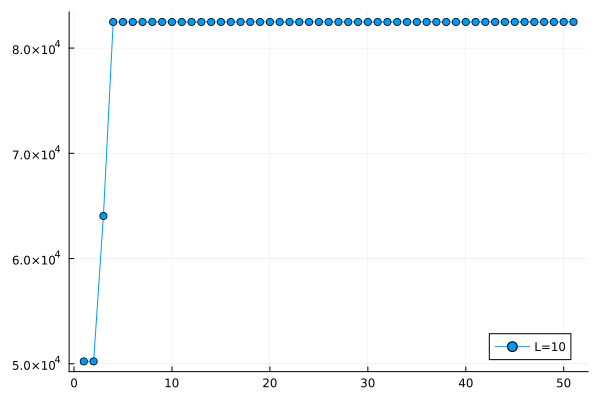

In [371]:
plot(ram_usage,marker=:circle,label="L=$(ct_f.L)")

In [372]:
ct_f.mps

MPS
[1] ((dim=2|id=20|"Qubit,Site,n=1"), (dim=2|id=165|"Link,l=1"))
[2] ((dim=2|id=165|"Link,l=1"), (dim=2|id=374|"Qubit,Site,n=2"), (dim=4|id=26|"Link,l=2"))
[3] ((dim=4|id=26|"Link,l=2"), (dim=8|id=775|"Link,l=3"), (dim=2|id=544|"Qubit,Site,n=3"))
[4] ((dim=2|id=697|"Qubit,Site,n=4"), (dim=16|id=693|"Link,l=4"), (dim=8|id=775|"Link,l=3"))
[5] ((dim=32|id=631|"Link,l=5"), (dim=2|id=646|"Qubit,Site,n=5"), (dim=16|id=693|"Link,l=4"))
[6] ((dim=2|id=188|"Qubit,Site,n=6"), (dim=32|id=24|"Link,l=6"), (dim=32|id=631|"Link,l=5"))
[7] ((dim=16|id=82|"Link,l=7"), (dim=2|id=943|"Qubit,Site,n=7"), (dim=32|id=24|"Link,l=6"))
[8] ((dim=2|id=287|"Qubit,Site,n=8"), (dim=8|id=842|"Link,l=8"), (dim=16|id=82|"Link,l=7"))
[9] ((dim=4|id=345|"Link,l=9"), (dim=2|id=171|"Qubit,Site,n=9"), (dim=8|id=842|"Link,l=8"))
[10] ((dim=2|id=880|"Qubit,Site,n=10"), (dim=2|id=128|"Link,l=10"), (dim=4|id=345|"Link,l=9"))
[11] ((dim=2|id=77|"Qubit,Site,n=11"), (dim=2|id=128|"Link,l=10"))


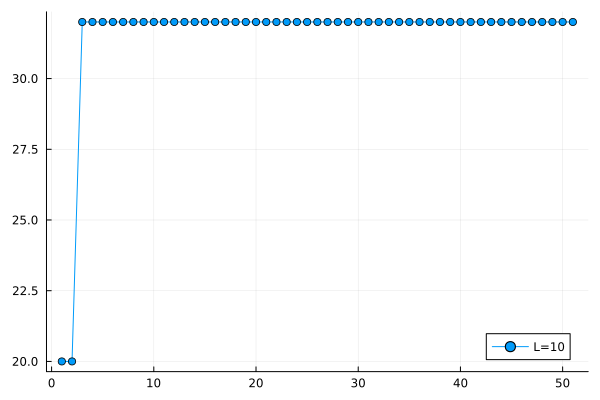

In [373]:
plot(max_bond,marker=:circle,label="L=$(ct_f.L)")

In [167]:
CT.random_control!(ct_f,1,0)

2

In [168]:
reset_timer!(CT.to)
@show i=CT.random_control!(ct_f,i,0)

print_timer(CT.to)

InterruptException: InterruptException:

In [169]:
Base.summarysize(ct_f.mps)/1024^3

0.07292763888835907

In [170]:
using TimerOutputs

In [171]:
reset_timer!(CT.to)

 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:      802ms /   0.0%           22.9MiB /   0.0%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 ────────────────────────────────────────────────────────────────────

In [172]:
CT.to

 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:      844ms /   0.0%           23.3MiB /   0.0%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 ────────────────────────────────────────────────────────────────────

In [173]:
@btime CT.inner_prob(ct_f,[0])

MethodError: MethodError: no method matching inner_prob(::CT.CT_MPS, ::Vector{Int64})

Closest candidates are:
  inner_prob(::CT.CT_MPS, ::Vector{Int64}, !Matched::Vector{Int64})
   @ CT /mnt/d/Rutgers/control_transition/CT/src/CT.jl:338


In [174]:
@code_warntype CT.S!(ct_f,10,rng=ct_f.rng_C)

In [ ]:
@code_warntype CT.projector(ct_f,[0],[10])

In [ ]:
@code_warntype CT.inner_prob(ct_f,[0],[10])

In [ ]:
ct_f.phy_ram

In [ ]:
ct_f.phy_list

In [ ]:
sort(ct.phy_ram[ct.phy_list])

In [ ]:
(ct.phy_ram[ct.L+1])

In [ ]:
(ct_f.phy_ram[[ct_f.L+1]])

In [ ]:
ct_f.phy_ram[ct_f.phy_list]

In [ ]:
ct_f.phy_ram

In [ ]:
ct_f.mps

In [ ]:
CT.ZZ(ct)

In [ ]:
CT.ZZ(ct_f)

In [ ]:
ct.mps

In [ ]:
ct.ram_phy, ct.phy_ram, ct.phy_list

In [ ]:
CT.mps_element(ct.mps,"00000")

In [ ]:
v0=prod(ct.mps[1:5])* state(siteind(ct.mps,5),"0")
v1=prod(ct.mps[1:5])* state(siteind(ct.mps,5),"1")

In [ ]:
v0=prod(ct.mps[1:5])* state(siteind(ct.mps,1),"0")
v1=prod(ct.mps[1:5])* state(siteind(ct.mps,1),"1")

In [ ]:
norm(ct.mps)

In [ ]:
print(conj(v0)*v1)

In [ ]:
CT.Z(ct)

In [ ]:
ct.phy_ram

In [ ]:
ct.phy_list

In [ ]:
CT.ZZ(ct)

In [ ]:
ct.ram_phy

In [ ]:
ct.qubit_site

In [ ]:
CT.ZZ(ct)

# Obs-del

In [ ]:
mutable struct CT
    L::Int
    store_vec::Bool
    store_op::Bool
    store_prob::Bool
    seed::Union{Int, Nothing}
    seed_vec::Union{Int, Nothing}
    seed_C::Union{Int, Nothing}
    x0::Union{Rational{Int}, Nothing}
    xj::Set
    _eps::Float64
    ancilla::Bool
    folded::Bool
    rng::Random.AbstractRNG
    rng_vec::Random.AbstractRNG
    rng_C::Random.AbstractRNG
    qubit_site::Vector{Index{Int64}}
    phy_ram::Vector{Int}
    ram_phy::Vector{Int}
    _maxdim::Int
    _cutoff::Float64
    mps::Union{MPS,Nothing}
end

In [ ]:
function CT(; L::Int, store_vec::Bool=false, store_op::Bool=false, store_prob::Bool=false, seed::Union{Nothing,Int}=nothing, seed_vec::Union{Nothing,Int}=nothing, seed_C::Union{Nothing,Int}=nothing, x0::Union{Rational{Int},Nothing}=nothing, xj::Set=Set([1 // 3, 2 // 3]), _eps::Float64=1e-10, ancilla::Bool=false, folded::Bool=false, _maxdim::Int=10, _cutoff::Float64=1e-10)
    rng = MersenneTwister(seed)
    rng_vec = seed_vec === nothing ? rng : MersenneTwister(seed_vec)
    rng_C = seed_C === nothing ? rng : MersenneTwister(seed_C)

    ct = CT(L, store_vec, store_op, store_prob, seed, seed_vec, seed_C, x0, xj, _eps, ancilla, folded, rng, rng_vec, rng_C, [], [], [], _maxdim, _cutoff, nothing)


    ct.qubit_site, ct.ram_phy, ct.phy_ram = _initialize_basis(ct)

    ct.mps = _initialize_vector(ct)

    return ct
end


In [ ]:
function _initialize_basis(ct::CT)

    qubit_site = siteinds("Qubit", ct.L)
    # ram_phy[actual in ram] = physical 
    ram_phy = ct.folded ? [i for pairs in zip(1:(ct.L÷2), reverse((ct.L÷2+1):ct.L)) for i in pairs] : 1:ct.L    
    
    # phy_ram[physical] = actual in ram
    phy_ram = fill(0, ct.L)
    for (ram, phy) in enumerate(ram_phy)
        phy_ram[phy] = ram
    end
    return qubit_site, ram_phy, phy_ram
end

In [ ]:
function _initialize_vector(ct::CT)
    if !ct.ancilla
        if ct.x0 !== nothing
            vec_int = dec2bin(ct.x0, ct.L)
            vec_int_pos =[string(s) for s in lpad(string(vec_int, base=2), ct.L, "0")] # physical index
            return MPS(ct.qubit_site,[vec_int_pos[ct.ram_phy[i]] for i in 1:ct.L])
        else
            return randomMPS(ct.rng_C,ct.qubit_site,linkdims=10)
        end
    else
        nothing
    end
    # return MPS(vec, ct.qubit_site; cutoff=ct._eps, maxdim=ct._maxdim)

end

In [ ]:
function dec2bin(x::Real, L::Int)
    @assert 0 <= x < 1 "$x is not in [0,1)"
    
    return BigInt(floor(x * (BigInt(1) << L)))
end

In [ ]:
"""
apply the operator `op` to `mps`, the `op` should have indices of (i,i+1,.. i',i+1',..)
"""
function apply_op!(mps::MPS, op::Union{ITensor};cutoff::Float64=1e-8)
    i=parse(Int,replace(string(op.tensor.inds[1].tags),"\""=>"","Site,n=" => ""))
    j=parse(Int,replace(string(op.tensor.inds[end].tags),"\""=>"","Site,n=" => ""))
    orthogonalize!(mps,i)
    mps_ij = mps[i]
    for idx in i+1:j
        mps_ij *= mps[idx]
    end
    mps_ij *= op
    noprime!(mps_ij)

    if i==j
        mps[i]=mps_ij
    else
        for idx in i:j-1
            inds1=uniqueinds(mps[i],mps[i+1])
            U,S,V=svd(mps_ij,inds1,cutoff=cutoff)
            mps[idx]=U
            mps_ij=S*V
        end
        mps[j]=mps_ij
    end
    return 
end

In [ ]:
"""
compute the entanglement entropy of 1...i, i+1...L (ram sites)
"""
function von_Neumann_entropy(mps::MPS, i::Int)
    mps_=orthogonalize(mps,i)
    # _,S = svd(mps_[i], (linkind(mps_, i-1), siteind(mps_,i)))
    _,S = svd(mps_[i], (linkind(mps_, i), ))
    SvN=0.
    print(S)
    for n=1:dim(S,1)
        p = S[n,n]^2
        SvN-=p * log(p)
    end
    return SvN
end

In [ ]:
function mps_to_tensor(mps; array=false, vector=false, column_first=true)
    # Start with the first tensor
    psi = mps[1]
    
    # Sequentially contract the tensors
    for i = 2:length(mps)
        psi = psi * mps[i]
    end
    # Convert the resulting tensor to a dense array
    # print(psi)
    if array
        psi=array(psi)
        if vector
            if column_first
                return vec(psi)
            else
                return vec(permutedims(psi, reverse(1:ndims(psi))))
            end
        else
            return psi
        end
    else
        return psi
    end
end

In [ ]:
function mps_element(mps::MPS, x::String)
    @assert length(x) == length(mps)
    x=[string(s) for s in x]
    V=ITensor(1.)
    for i = 1:length(mps)
        V *= (mps[i] * state(siteind(mps,i),x[i]))
    end
    return scalar(V)
end

In [ ]:
randomMPS(ct.rng_C,ct.qubit_site,linkdims=10)

In [ ]:
mps_element(ct.mps,"00101010")

In [ ]:
ct.ram_phy

In [ ]:
"00101010"[ct.ram_phy]

In [ ]:
mps_element(ct.mps,"00101010"[ct.ram_phy])

In [ ]:
state(ct.qubit_site[1],"0")

In [ ]:
print(state(ct.qubit_site[1],"0"))

In [ ]:
von_Neumann_entropy(M,N÷2)

In [ ]:
ss=svdvals(reshape(Array(T,idx),(2^(N ÷ 2),2^(N ÷ 2))))

In [ ]:
pp=ss.^2

In [ ]:
sum(-pp.*log.(pp))

In [ ]:
b=2
orthogonalize!(M, b)
(linkind(M, b-1), siteind(M,b))

In [ ]:
using LinearAlgebra

In [ ]:
svd

In [ ]:
S

In [ ]:
V

In [ ]:
array(UU)

In [ ]:
array(U)

In [ ]:
UU,SS=svd(M[b], (linkind(M, b-1), siteind(M,b)),)

In [ ]:
U,S,V=svd(M[b], (linkind(M, b-1), siteind(M,b)),)

In [ ]:
linkind(M, b-1)

In [ ]:
print(von_Neumann_entropy(M,2))

In [ ]:
idx=siteinds("Qubit", 5)

In [ ]:
# U1=randomITensor([idx[2],idx[2]'])

In [ ]:
U2=ITensor(reshape(collect(1:16.),(2,2,2,2)),idx[2],idx[4],idx[2]',idx[4]')
# U2=randomITensor([idx[3],idx[4],idx[3]',idx[4]'])

In [ ]:
U3=randomITensor([idx[1],idx[2],idx[3],idx[1]',idx[2]',idx[3]'])

In [ ]:
# print(apply_op!(M,U1))
# print(apply_op!(M,U2))
print(apply_op!(M,U3))

In [ ]:
mps_to_tensor(M)

In [ ]:
T

In [ ]:
T*U2

In [ ]:
array(permute(noprime!(U2*T),idx)-mps_to_tensor(M))

In [ ]:
noprime!(U1*T)

In [ ]:
array(permute(noprime!(U3*T),idx)-mps_to_tensor(M))

In [ ]:
permute(noprime!(U2*T),idx)≈ mps_to_tensor(M)

In [ ]:
print(permute(noprime!(U2*T),idx))

In [ ]:
T_arr=array(T)
U2_arr=array(U2)
r=zeros(2,2,2,2)
for i in 1:2
    for j in 1:2
        for k in 1:2
            for l in 1:2
                # println([U2_arr[s1,s2,i,j] * T_arr[s1,s2,k,l] for s1 in 1:2 for s2 in 1:2])
                r[i,j,k,l]=sum([U2_arr[s1,s2,i,j] * T_arr[s1,s2,k,l] for s1 in 1:2 for s2 in 1:2])
            end
        end
    end
end

In [ ]:
r

In [ ]:
mps_to_tensor(M)-r

In [ ]:
_initialize_vector(ct)

In [ ]:
ct=CT(L=4,seed=0,folded=false,x0=1//3)

In [ ]:
ct_f=CT(L=4,seed=0,folded=true,x0=1//3,)

In [ ]:
ct.mps

In [ ]:
zz=_initialize_vector(ct)

In [ ]:
tt=mps_to_tensor(ct.mps)

In [ ]:
size(tt)

In [ ]:
tt[1,2,1,2]

In [ ]:
tt_f=mps_to_tensor(ct_f.mps)

In [ ]:
size(tt_f)

In [ ]:
tt_f[1,2,2,1]

In [ ]:
_initialize_basis(ct)

In [ ]:
fill(0,10)

In [ ]:
typeof(siteinds(2,2)[])

In [ ]:
[0,1]

In [ ]:
methods(state)

In [ ]:
qubit_site=siteinds("Qubit", 4)

In [ ]:
split("0110","")

In [ ]:
typeof(qubit_site)

In [ ]:
MPS(qubit_site,[string(s) for s in "0110"])

In [ ]:
typeof(ct.qubit_site)

In [ ]:
typeof(siteinds("Qubit", ct.L))

In [ ]:
using ITensors

In [ ]:
CT.greet()

In [ ]:
ct.ram_phy

In [ ]:
ct.phy_ram

In [ ]:
ct.phy_list

In [ ]:
CT.Z(ct)

In [ ]:
ct.

In [ ]:
i=1
for idx in 1:2*ct.L^2
    i=CT.random_control!(ct,i,0.5,)
end

In [ ]:
CT.von_Neumann_entropy(ct.mps,2)

In [ ]:
ct.ram_phy

In [169]:
function run_example(L,p,seed)
    # ct=CT.CT_MPS(L=L,seed=seed,x0=0//32,folded=true,store_op=true,store_vec=true)
    ct=CT.CT_MPS(L=L,seed=seed,folded=true,store_op=false,store_vec=false,ancilla=1)
    # ct=CT.CT_MPS(L=L,seed=seed,folded=false,store_op=false,store_vec=true,ancilla=1,xj=Set([0]))
    i=1
    # println(ct.mps)
    tf=(ct.ancilla ==0) ? 2*ct.L^2 : div(ct.L^2,2)
    for idx in 1:tf
        # println("Run:$idx")
        i=CT.random_control!(ct,i,p,)
        # println(ct.mps)
    end
    O=CT.order_parameter(ct)
    if ct.ancilla==0
        EE=CT.von_Neumann_entropy(ct.mps,ct.L÷2)
    else
        EE=CT.von_Neumann_entropy(ct.mps,1)
    end
    return O,EE
end


run_example (generic function with 1 method)

In [170]:
run_example(6, 0.9,  10)

(0.9999999999999999, 0.0)

In [171]:
run_example(10, 0.1,  10)

(0.07683647134510535, 0.6896784878870977)

In [172]:
p_list=0:0.1:1
seed_list=1:20
L_list=[6,8]
O_list=zeros(length(L_list),length(p_list),length(seed_list))
EE_list=zeros(length(L_list),length(p_list),length(seed_list))
last_p=0
last_L=8
last_seed=-1
for (L_idx,L) in enumerate(L_list)
    for (p_idx,p) in enumerate(p_list)
        println("Now computing $p,$L")
        for (seed_idx,seed) in enumerate(seed_list)
            O,EE=run_example(L,p,seed)
            O_list[L_idx,p_idx,seed_idx]=O
            EE_list[L_idx,p_idx,seed_idx]=EE
            last_p=p
            last_L=L
            last_seed=seed
        end
    end
end


Now computing 0.0,6


Now computing 0.1,6


Now computing 0.2,6


Now computing 0.3,6


Now computing 0.4,6


Now computing 0.5,6


Now computing 0.6,6


Now computing 0.7,6


Now computing 0.8,6


Now computing 0.9,6


Now computing 1.0,6


Now computing 0.0,8


Now computing 0.1,8


Now computing 0.2,8


Now computing 0.3,8


Now computing 0.4,8


Now computing 0.5,8


Now computing 0.6,8


Now computing 0.7,8


Now computing 0.8,8


Now computing 0.9,8


Now computing 1.0,8


In [ ]:
mean(EE_list[1,:,:],dims=2)

In [ ]:
mean(EE_list[2,:,:],dims=2)

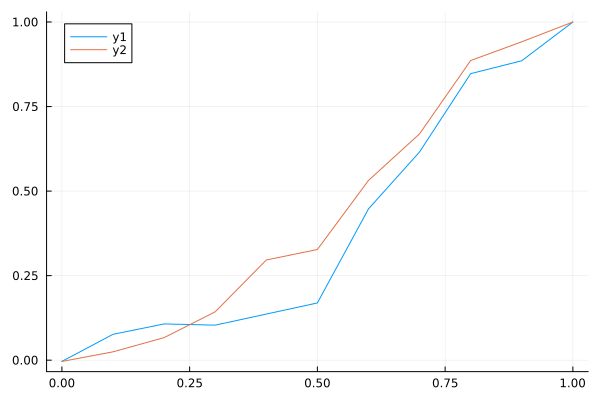

In [173]:
plot()
plot!(p_list,mean(O_list[1,:,:],dims=2))
plot!(p_list,mean(O_list[2,:,:],dims=2))

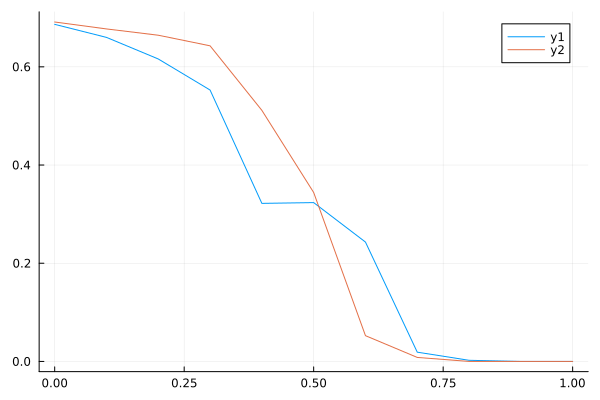

In [174]:
plot()
plot!(p_list,mean(EE_list[1,:,:],dims=2))
plot!(p_list,mean(EE_list[2,:,:],dims=2))

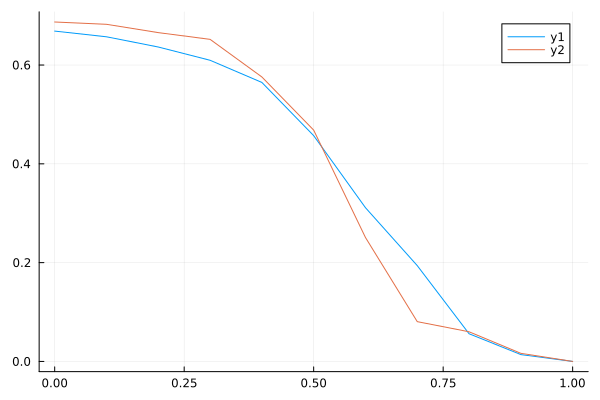

In [108]:
plot()
plot!(p_list,mean(EE_list[1,:,:],dims=2))
plot!(p_list,mean(EE_list[2,:,:],dims=2))

In [ ]:
using Profile


In [ ]:
Profile.clear()
@profile run_example(8, 1,  10)
Profile.print()

In [ ]:
using BenchmarkTools

In [ ]:
@btime run_example(8, 1,  10)

In [ ]:
using ProgressMeter

In [ ]:
size(O_list)

In [ ]:
mean(O_list,dims=2)

In [ ]:
run_example(10,0.1,3)

In [ ]:
CT.Z(ct)

In [ ]:
for history in ct.op_history
    println(history)
end

In [ ]:
CT.Z(ct)

In [ ]:
CT.Z(ct)

In [ ]:
keyword, parameter
check folded?

In [ ]:
CT.inner_prob(ct,[0,],[4])

In [ ]:
expect(ct.mps,"ProjUp",sites=[3])

In [ ]:
rand(ct.rng)

In [ ]:
CT.R!(ct,[1],[1])

In [ ]:
CT.Z(ct)

In [ ]:
1 in [1,2,3]

In [ ]:
ct.xj in [Set([1 // 3, 2 // 3]),Set([0])]

In [ ]:
CT.Z(ct)

In [ ]:
CT.X!(ct,1)

In [ ]:
CT.Z(ct)

In [ ]:
CT.P!(ct,[1],[2])

In [ ]:
CT.Z(ct)

In [ ]:
CT.X!(ct,2)

In [ ]:
CT.Z(ct)

In [ ]:
norm(ct.mps)

In [ ]:
CT.P!(ct,[1],[2])

In [ ]:
CT.Z(ct)

In [ ]:
norm(ct.mps)

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site[ct.phy_ram])

In [ ]:
ct.mps

In [ ]:
CT.Z(ct)

In [ ]:
CT.von_Neumann_entropy(ct.mps,2)

In [ ]:
uniqueinds(ct.mps[2],ct.mps[3])

In [ ]:
svd(mps_ij)

In [ ]:
for i in 1:3
    CT.S(ct,i;rng=ct.rng_C)
end

In [ ]:
norm(CT.mps_to_tensor(ct.mps))

In [ ]:
ct.mps

In [ ]:
ct.mps[2]

In [ ]:
ct.mps

In [ ]:
ct.qubit_site

In [ ]:
inds(ct.mps)

In [ ]:
linkind(ct.mps,1)

In [ ]:
uniqueinds(ct.mps[1],ct.mps[2])

In [ ]:
ct.mps

In [ ]:
linkind(ct.mps,2)

In [ ]:
linkind(ct.mps,2)

In [ ]:
CT.von_Neumann_entropy(ct.mps,2)

In [ ]:
ψ′=MPS(insert!(copy(ITensors.data(ψ)), b, ψb))

In [ ]:
lb=(linkind(ψ,1))

In [ ]:
l′b=sim(linkind(ψ,1))

In [ ]:
δlb=δ(dag(lb), l′b)

In [ ]:
ψ′[1]

In [ ]:
ψ′[1]*δlb

In [ ]:
ψ′[2]*(δlb)

In [ ]:
ψ′[3]

In [ ]:
state()

In [ ]:
function insert(ψ::MPS, b::Integer, ψb::ITensor)
    dataψ′ = insert!(copy(ITensors.data(ψ)), b, ψb)
    # return dataψ′
    ψ′ = MPS(dataψ′)
    lb = linkind(ψ, b - 1)
    l′b = sim(lb)
    δlb = δ(dag(lb), l′b)
    ψ′[b - 1] *= δlb
    # ψ′[b] *= dag(δlb)
    ψ′[b] *= (δlb)
    return ψ′
  end
  
 

In [ ]:
N = 4
s = siteinds("S=1/2", N; )
ψ = randomMPS(s, n -> isodd(n) ? "↑" : "↓")

In [ ]:
expect(ψ, "Sz",)

In [ ]:
b = 2
sb = siteind("S=1/2"; )
ψb = onehot(sb => 1)

In [ ]:

ψ′ = insert(ψ, 2, ψb)


In [ ]:
expect(ψ', "Sz",)

In [ ]:
show norm(prod(ψ) * ψb - prod(ψ′))

In [ ]:
n=5
s1 = siteinds("Qubit", n)
# s2 = siteinds("Qubit", 1)
psi1= randomMPS(MersenneTwister(1),ComplexF64,s1[1:n-1];linkdims=2)
psi2= randomMPS(MersenneTwister(3),ComplexF64,s1[1:n-1];linkdims=2)
psi3=psi2- inner(psi1,psi2)*psi1
psi3=psi3/norm(psi3)

anc_0=  MPS(s1[n:n], ["0",])
anc_1=  MPS(s1[n:n], ["1",])

# psi1 = MPS(s1, ["0", "0", "0", "0"])
# psi2 = MPS(s1, ["1", "1", "1", "1"])

In [ ]:

CT.attach_mps(anc_0,psi1)

In [ ]:
psi1_new=CT.attach_mps(anc_0,psi1)

In [ ]:
psi2_new=CT.attach_mps(anc_1,psi3)

In [ ]:
psi2_new

In [ ]:
CT.mps_element(psi2_new,"10100")

In [ ]:
CT.mps_element(psi3,"0100")

In [ ]:
psi_sum=(psi1_new+psi2_new)/sqrt(2)

In [ ]:
inner(psi_sum',psi_sum)

In [ ]:
zz=MPS([1 0 ; 0 im],s1[1:2])

In [ ]:
inner(conj(zz),zz)

In [ ]:
inner(psi1,psi1)

In [ ]:
v0=prod(psi_sum[1:5])* state(siteind(psi_sum,5),"0")
v1=prod(psi_sum[1:5])* state(siteind(psi_sum,5),"1")

In [ ]:
print(conj(v0)*v1)

In [ ]:
inds(mps1[4])

In [ ]:
vcat(siteinds(psi1),siteinds(anc_0))

In [ ]:
orthogonalize!(psi1,n-1)
mps_=psi1[n-1]*anc_0[1]
U,S,V=svd(mps_,inds(psi1[n-1]),cutoff=1e-10,lefttags=replace(string(tags((findinds(inds(mps_),"Link")[1]))),r"l=[\d]+"=>"l=$(n-1)",'"'=>""))
psi_new=MPS(s1,)
for i in 1:n
    if i < n-1
        psi_new[i]=psi1[i]
    elseif i==n-1
        psi_new[i]=U
    elseif i==n
        psi_new[i]=S*V
    end
end

In [ ]:
push!(psi1,S*V)

In [ ]:
psi1[n]=S*V

In [ ]:
print(S*V)

In [ ]:
CT.mps_element(psi1,"0000")

In [ ]:
print(state(s1[1],"0"))

In [ ]:
print(array(S*V)[1,:,:])

In [ ]:
print(psi1[1])

In [ ]:
psi01=MPS(s1,"0")


In [ ]:
vcat(s1,s2)

In [ ]:
mps=MPS(vcat(s1,s2),"0")



In [ ]:
s1=siteinds("Qubit", 10)

In [ ]:
mps=randomMPS(s1,linkdims=10)

In [ ]:
truncate(mps,cutoff=1e-10)

In [ ]:
mps=MPS(vcat(s1,s2),"0")

for idx in 2:n
    if idx == 2
        arr=array(mps1[idx-1])

        mps[idx] = ITensor(reshape(arr,(1,size(arr)...)),inds(mps[idx]))
    else
        mps[idx]=ITensor( array(psi1[idx-1]) , inds(mps[idx]))
    end
end

In [ ]:
arr=array(psi1[1])

In [ ]:
(reshape(arr,(1,size(arr)...)))

In [ ]:
storage(psi01[2])

In [ ]:
ITensor(reshape(arr,(1,size(arr)...)),inds(psi01[2]))

In [ ]:
inds(psi01[2])

In [ ]:
pp=array(psi1[2-1])

In [ ]:
reshape(pp,(1,size(pp)...))

In [ ]:
ITensor(array(psi1[2-1]),inds(psi1[2]))

In [ ]:
(linkind(psi01,1))

In [ ]:
typeof(s[1])

In [ ]:
s1=siteinds("Qubit", 4)
mps1= randomMPS(s;linkdims=3)

s2=siteinds("Qubit", 1)
mps2 = MPS(s2, ["0"])   

In [ ]:
# mps = kron(mps2, mps1) ?

In [ ]:
N = 3

s = siteinds("Qubit", N; )

states = [n<=2 ? "Dn" : "Up" for n=1:N-1]

r = randomMPS(s[2:N], states; linkdims=2)
psi_temp = MPS(s,"0")

for i in 2:N
   psi_temp[i]=r[i-1] 
end

psi1 = psi_temp

In [ ]:
psi1

In [ ]:
i = Index(3,"index_i")
j = Index(2,"index_j")
k = Index(4,"index_k")

T = ITensor(i,j,k)

In [ ]:
T[i=>2,j=>1,k=>3]=1.

In [ ]:
psi01[2]

In [ ]:
print(psi01[1])

In [ ]:
print(psi1[1])

In [ ]:
Array(psi1[1],[site])

In [ ]:
ITensor([psi[1]])

In [ ]:
psi01[2]=ITensor([psi[1]])

In [ ]:
print(psi01[2])

In [ ]:
print(psi1[1])

In [ ]:
psi01

In [ ]:
CT.mps_to_tensor(psi01)

In [ ]:
psi1

In [ ]:
psi3

In [ ]:
inner(psi1, psi3)

In [ ]:
psi0=add(psi1,psi2;cutoff=1e-10)

In [ ]:
psi12=add(psi1,psi2;alg="directsum")

In [ ]:
Array(CT.mps_to_tensor(psi1),s1)

In [ ]:
Array(CT.mps_to_tensor(psi2),s1)

In [ ]:
Array(CT.mps_to_tensor(psi12),s1)

In [ ]:
add(ψ1,ψ1) 

In [ ]:
[ψ[n] * ψ[n + 1] for n in 1:2:(n - 1)]

In [ ]:
ψ2 = MPS([ψ[n] * ψ[n + 1] for n in 1:2:(n - 1)])


In [ ]:
ct=CT.CT_MPS(L=4,seed=1,x0=0//16,folded=false)

In [ ]:
ct.mps

In [ ]:
CT.S!(ct,4;rng=MersenneTwister(1))

In [ ]:
ct.mps

In [ ]:
inds(ct.mps[2])

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site)

In [ ]:
CT.Z(ct)

In [ ]:
M_new=orthogonalize(M,2)

In [ ]:
U2

In [ ]:
mps_ij=(M_new[2]*M_new[3]*M_new[4])*U2

In [ ]:
CT.apply_op!(M,U2)

In [ ]:
ITensor(CT.U(4),ct.qubit_site[2],ct.qubit_site[4],ct.qubit_site[2]',ct.qubit_site[4]')

In [ ]:
Array(CT.mps_to_tensor(M),idx)

In [ ]:
isapprox(Array(noprime!(T*U2),idx),Array(CT.mps_to_tensor(M),idx))

In [ ]:
CT.mps_element(ct.mps,"00001")

In [ ]:
Array(CT.mps_to_tensor(ct.mps),ct.qubit_site)[1,1,1,1,2]

In [ ]:
let i=4
    ct.phy_ram[[ct.phy_list[i],ct.phy_list[(i)%ct.L+1]]]
    
end

In [ ]:
CT.U(4,rng=ct.rng_C)

In [ ]:
zz=CT.U(4)

In [ ]:
reshape(zz,2,2,2,2)

In [ ]:
CT.Z(ct)

In [ ]:
CT.ZZ(ct)

In [ ]:
CT.von_Neumann_entropy(ct.mps,div(ct.L,2))

In [ ]:
expect(ct.mps,"Sz")[ct.phy_ram]

In [ ]:
Q

In [ ]:
function U(n;rng::Random.AbstractRNG=MersenneTwister(nothing))
    z=randn(rng,4,4)+randn(rng,4,4)*im
    Q,R=qr(z)
    r_diag=diag(R)
    Lambda=Diagonal(r_diag./abs.(r_diag))
    Q*=Lambda
    return Q
end

In [ ]:
U_map=zeros(Complex,100,4,4)
for i in 1:100
    U_map[i,:,:]=U(4)
end

In [ ]:
qq=U(4)

In [ ]:
(qq[:,1])' * qq[:,1]

In [ ]:
(U_map[1,:,1])' * U_map[1,:,2]

In [ ]:
sum(abs.(U_map).^2,dims=[1,2])

In [ ]:
ct.mps

In [ ]:
using Random

In [ ]:
randn(4,4)+randn(4,4)*im

In [ ]:
Q

4×4 Matrix{ComplexF64}:
  0.241388-0.445579im  -0.378112+0.254543im   …   0.198841+0.0531314im
   0.61911+0.232944im   0.514138+0.10812im       -0.160158+0.33377im
 0.0630687+0.147585im   0.472232-0.0991936im      0.566715-0.555979im
  0.238078+0.472432im  -0.529014-0.0592682im      0.419537-0.11957im

In [ ]:
using LinearAlgebra

In [ ]:
Lambda

4-element Vector{ComplexF64}:
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im

In [ ]:
Diagonal(Lambda)

4×4 Diagonal{ComplexF64, Vector{ComplexF64}}:
 -1.0+0.0im      ⋅           ⋅          ⋅    
      ⋅      1.0+0.0im       ⋅          ⋅    
      ⋅          ⋅      -1.0+0.0im      ⋅    
      ⋅          ⋅           ⋅      1.0+0.0im

In [ ]:
Q

4-element Vector{ComplexF64}:
   0.279558410221431 - 0.3205567810049119im
 -0.7417840765323529 + 0.5731761757664646im
  1.1107684390167805 - 0.460624395867162im
  0.7860659376728949 - 0.9361810098531589im

In [ ]:
diagm([1,3,])

LoadError: UndefVarError: `diagm` not defined

In [ ]:
isapprox(Q*R,z)

true

In [ ]:
Matrix(
Q
)

4×4 Matrix{ComplexF64}:
  -0.649365+0.597974im  0.00396232+0.0927084im  …   0.170378-0.186357im
   0.195642+0.225327im   -0.152302+0.285702im       0.122146+0.822459im
  -0.171775+0.291146im   -0.146135-0.232503im       0.414225+0.219354im
 -0.0668647+0.113845im    0.891284+0.129489im      -0.114906+0.109461im

In [ ]:
diag(R)

4-element Vector{ComplexF64}:
  3.568613493742204 + 0.0im
  2.303632184469375 + 0.0im
  -2.64876097164952 + 0.0im
 -1.532561276392839 + 0.0im

In [ ]:
expect(ct.mps,[1 0;0 -1])

4-element Vector{Float64}:
 -1.0
  1.0
 -1.0
  1.0

In [ ]:
os = OpSum()
for j=1:ct.L-1
os += "Sz",j,"Sz",j+1
end
os += "Sz",ct.L,"Sz",1

sum(
  1.0 Sz(1,) Sz(2,)
  1.0 Sz(2,) Sz(3,)
  1.0 Sz(3,) Sz(4,)
  1.0 Sz(4,) Sz(5,)
  1.0 Sz(5,) Sz(6,)
  1.0 Sz(6,) Sz(7,)
  1.0 Sz(7,) Sz(8,)
  1.0 Sz(8,) Sz(1,)
)

In [ ]:
ct.phy_list[1:end-1]

7-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7

In [ ]:
zz=MPO(os,ct.qubit_site)

MPO
[1] ((dim=3|id=585|"Link,l=1"), (dim=2|id=75|"Qubit,Site,n=1")', (dim=2|id=75|"Qubit,Site,n=1"))
[2] ((dim=3|id=585|"Link,l=1"), (dim=4|id=23|"Link,l=2"), (dim=2|id=960|"Qubit,Site,n=2")', (dim=2|id=960|"Qubit,Site,n=2"))
[3] ((dim=4|id=23|"Link,l=2"), (dim=4|id=962|"Link,l=3"), (dim=2|id=82|"Qubit,Site,n=3")', (dim=2|id=82|"Qubit,Site,n=3"))
[4] ((dim=4|id=962|"Link,l=3"), (dim=4|id=136|"Link,l=4"), (dim=2|id=937|"Qubit,Site,n=4")', (dim=2|id=937|"Qubit,Site,n=4"))
[5] ((dim=4|id=136|"Link,l=4"), (dim=4|id=349|"Link,l=5"), (dim=2|id=526|"Qubit,Site,n=5")', (dim=2|id=526|"Qubit,Site,n=5"))
[6] ((dim=4|id=349|"Link,l=5"), (dim=4|id=868|"Link,l=6"), (dim=2|id=75|"Qubit,Site,n=6")', (dim=2|id=75|"Qubit,Site,n=6"))
[7] ((dim=4|id=868|"Link,l=6"), (dim=3|id=824|"Link,l=7"), (dim=2|id=791|"Qubit,Site,n=7")', (dim=2|id=791|"Qubit,Site,n=7"))
[8] ((dim=3|id=824|"Link,l=7"), (dim=2|id=244|"Qubit,Site,n=8")', (dim=2|id=244|"Qubit,Site,n=8"))


In [ ]:
-inner(ct.mps',zz,ct.mps)*4/ct.L

0.9999999999999998

In [ ]:
ct.xj in [Set([1//3,2//3])]

true

In [ ]:
using ITensors

In [ ]:
rng = MersenneTwister(nothing)

MersenneTwister(0xe9fd1d667ccf06752598584e16024d68)

In [ ]:
zz=randomITensor(rng,siteinds(2,2))

ITensor ord=2 (dim=2|id=262|"Site,n=1") (dim=2|id=253|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
T=

In [ ]:
print(zz)

ITensor ord=2
Dim 1: (dim=2|id=262|"Site,n=1")
Dim 2: (dim=2|id=253|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -0.4529424277094967  1.9115524850366077
  0.5052402424188795  0.1857076924423848

In [ ]:
ct.L

4

In [ ]:
typeof(1//2)

Rational{Int64}

In [ ]:
Set([1,2])

Set{Int64} with 2 elements:
  2
  1

In [ ]:
function initialize(N::Int, d::Int)
    sites = siteinds(d,N)
    psi = randomMPS(sites, d)
    return psi
end

In [ ]:
print(sqrt.(T*conj(T)))

ITensor ord=0
NDTensors.Dense{Float64, Vector{Float64}}
 0-dimensional
4.226020188649009

In [ ]:
N = 4  # number of sites
d = 2   # local degree of freedom for each site
idx = siteinds(d,N)
# T=randomITensor(MersenneTwister(1),ComplexF64,idx)
# T/=sqrt.(T*conj(T))
T = emptyITensor(idx)
# T[1,1,1,1,1]=1
# T[fill(1,N)...]=1
T[fill(1, N)...]=1/sqrt(2)
T[fill(2, N)...]=1/sqrt(2)
M=MPS(T,idx;cutoff=1e-10,maxdim=20)

MPS
[1] ((dim=2|id=733|"Site,n=1"), (dim=2|id=130|"Link,n=1"))
[2] ((dim=2|id=130|"Link,n=1"), (dim=2|id=411|"Site,n=2"), (dim=2|id=584|"Link,n=2"))
[3] ((dim=2|id=584|"Link,n=2"), (dim=2|id=509|"Site,n=3"), (dim=2|id=217|"Link,n=3"))
[4] ((dim=2|id=217|"Link,n=3"), (dim=2|id=312|"Site,n=4"))


In [ ]:
print(M[1])

ITensor ord=2
Dim 1: (dim=2|id=733|"Site,n=1")
Dim 2: (dim=2|id=130|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -1.0  -0.0
 -0.0   1.0

In [ ]:
print(M[2])

ITensor ord=3
Dim 1: (dim=2|id=130|"Link,n=1")
Dim 2: (dim=2|id=411|"Site,n=2")
Dim 3: (dim=2|id=584|"Link,n=2")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  1.0

In [ ]:
proj_0 = ITensor([1 0;0 0],idx[1],idx[1]')

ITensor ord=2 (dim=2|id=733|"Site,n=1") (dim=2|id=733|"Site,n=1")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
CT.apply_op!(M,proj_0)

[1]


In [ ]:
print(M[1])

ITensor ord=2
Dim 1: (dim=2|id=835|"Link,n=1")
Dim 2: (dim=2|id=733|"Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 0.7071067811865475  0.0
 0.0                 0.0

In [ ]:
print(M[2])

ITensor ord=3
Dim 1: (dim=2|id=411|"Site,n=2")
Dim 2: (dim=2|id=506|"Link,n=2")
Dim 3: (dim=2|id=835|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2
[:, :, 1] =
 1.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  1.0

In [ ]:
truncate!(M,cutoff=1e-10)

MPS
[1] ((dim=2|id=733|"Site,n=1"), (dim=1|id=653|"Link,n=1"))
[2] ((dim=2|id=411|"Site,n=2"), (dim=1|id=720|"Link,n=2"), (dim=1|id=653|"Link,n=1"))
[3] ((dim=2|id=509|"Site,n=3"), (dim=1|id=246|"Link,n=3"), (dim=1|id=720|"Link,n=2"))
[4] ((dim=2|id=312|"Site,n=4"), (dim=1|id=246|"Link,n=3"))


In [ ]:
print(M[1])

ITensor ord=2
Dim 1: (dim=2|id=733|"Site,n=1")
Dim 2: (dim=1|id=653|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×1
 0.7071067811865475
 0.0

In [ ]:
# U2=ITensor(reshape(collect(1:16.),(2,2,2,2)),idx[2],idx[4],idx[2]',idx[4]')
# U2=randomITensor(MersenneTwister(1),ComplexF64,idx[3],idx[4],idx[3]',idx[4]')
U2=ITensor(reshape(CT.U(4,rng=MersenneTwister(1)),2,2,2,2),idx[6],idx[1],idx[6]',idx[1]')
# U2_array=reshape(CT.U(4,rng=MersenneTwister(1)),2,2,2,2)
# idx[4],idx[1],idx[4]',idx[1]'

ITensor ord=4 (dim=2|id=662|"Site,n=6") (dim=2|id=336|"Site,n=1") (dim=2|id=662|"Site,n=6")' (dim=2|id=336|"Site,n=1")'
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [ ]:
Array(noprime!(U2*T),idx)

2×2×2×2×2×2 Array{ComplexF64, 6}:
[:, :, 1, 1, 1, 1] =
 0.135578-0.316341im  0.0+0.0im
 0.267593-0.193374im  0.0+0.0im

[:, :, 2, 1, 1, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 2, 1, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 2, 1, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 1, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 1, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 2, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 2, 2, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 1, 1, 2] =
 -0.187246-0.641857im  0.0+0.0im
  0.224307+0.524588im  0.0+0.0im

[:, :, 2, 1, 1, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 2, 1, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 2, 1, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 1, 1, 2, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2, 1, 2, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im



In [ ]:
ITensors.op(::OpName"U2",::SiteType"Qubit")=U_array

In [ ]:
os=OpSum()
os+="U2",2,3

sum(
  1.0 U2(2, 3)
)

In [ ]:
MPO(os,idx)

In [ ]:
_,SS=svd(reshape(Array(noprime!(T*U2),idx),4,4))

LinearAlgebra.SVD{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
U factor:
4×4 Matrix{ComplexF64}:
 0.104526+0.212572im   0.757525-0.608312im   …   3.85223e-17+9.0885e-17im
      0.0+0.0im             0.0+0.0im               0.179291-0.983796im
 0.181988+0.954341im  -0.217436+0.0939914im     -4.50434e-17-2.35156e-17im
      0.0+0.0im             0.0+0.0im                    0.0+0.0im
singular values:
4-element Vector{Float64}:
 0.8983322669889429
 0.43931667176025396
 0.0
 0.0
Vt factor:
4×4 Matrix{ComplexF64}:
 -0.778889+0.0im  0.588114-0.217839im  -0.0+0.0im  -0.0+0.0im
  0.627162+0.0im  0.730394-0.27054im   -0.0+0.0im  -0.0+0.0im
       0.0+0.0im       0.0+0.0im        0.0+0.0im   1.0+0.0im
       0.0+0.0im       0.0+0.0im        1.0+0.0im   0.0+0.0im

In [ ]:
SS

4-element Vector{Float64}:
 0.8983322669889429
 0.43931667176025396
 0.0
 0.0

In [ ]:
T=emptyITensor(idx,)
# T[1,1]=1/sqrt(2)
# T[2,2]=1im/sqrt(2)
# T=ITensor([1 0; 0 im]/sqrt(2),idx)

ITensor ord=4 (dim=2|id=733|"Site,n=1") (dim=2|id=411|"Site,n=2") (dim=2|id=509|"Site,n=3") (dim=2|id=312|"Site,n=4")
NDTensors.EmptyStorage{NDTensors.EmptyNumber, NDTensors.Dense{NDTensors.EmptyNumber, Vector{NDTensors.EmptyNumber}}}

In [ ]:
T[[1,2]...,[1,2]...]=1

1

In [ ]:
mm=MPS(T,idx)

MPS
[1] ((dim=2|id=626|"Site,n=1"), (dim=2|id=978|"Link,n=1"))
[2] ((dim=2|id=978|"Link,n=1"), (dim=2|id=871|"Site,n=2"))


In [ ]:
print(mm[2])

ITensor ord=2
Dim 1: (dim=2|id=978|"Link,n=1")
Dim 2: (dim=2|id=871|"Site,n=2")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 0.7071067811865475 + 0.0im                  0.0 + 0.0im
                0.0 + 0.0im  -0.7071067811865475 + 0.0im0.7071067811865475 + 0.0im                  0.0 + 0.0im
                0.0 + 0.0im  -0.7071067811865475 + 0.0im

In [ ]:
print(mm[1])

ITensor ord=2
Dim 1: (dim=2|id=626|"Site,n=1")
Dim 2: (dim=2|id=978|"Link,n=1")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}
 2×2
 1.0 + 0.0im  0.0 + 0.0im
 0.0 + 0.0im  0.0 - 1.0im

In [ ]:
CT.von_Neumann_entropy(mm,1)

ITensor ord=2
Dim 1: (dim=2|id=108|"Link,u")
Dim 2: (dim=2|id=796|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}
 2×2
 0.7071067811865475  0.0
 0.0                 0.7071067811865475

0.6931471805599454

In [ ]:
T[1,1,2,2]

-1.7542505415619625

In [ ]:
U=reshape(collect(1:4.),(2,2))

2×2 Matrix{Float64}:
 1.0  3.0
 2.0  4.0

In [ ]:
U=ITensor([1 2; 3 4],idx[1]',idx[1])

ITensor ord=2 (dim=2|id=159|"Site,n=1")' (dim=2|id=159|"Site,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
U_mps=MPS(U,[idx[1],idx'[1]];cutoff=1e-8,maxdim=10)

MPS
[1] ((dim=2|id=984|"Site,n=1"), (dim=2|id=56|"Link,n=1"))
[2] ((dim=2|id=56|"Link,n=1"), (dim=2|id=984|"Site,n=1")')


In [ ]:
U_mps

MPS
[1] ((dim=2|id=984|"Site,n=1"), (dim=2|id=56|"Link,n=1"))
[2] ((dim=2|id=56|"Link,n=1"), (dim=2|id=984|"Site,n=1")')


In [ ]:
print(U)

ITensor ord=2
Dim 1: (dim=2|id=984|"Site,n=1")
Dim 2: (dim=2|id=984|"Site,n=1")'
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 1.0  2.0
 3.0  4.0

In [ ]:
M

MPS
[1] ((dim=2|id=159|"Site,n=1"), (dim=1|id=756|"Link,n=1"))
[2] ((dim=1|id=756|"Link,n=1"), (dim=2|id=820|"Site,n=2"), (dim=1|id=859|"Link,n=2"))
[3] ((dim=1|id=859|"Link,n=2"), (dim=2|id=944|"Site,n=3"), (dim=1|id=788|"Link,n=3"))
[4] ((dim=1|id=788|"Link,n=3"), (dim=2|id=560|"Site,n=4"))


In [ ]:
M_=U*M[1]
# noprime

ITensor ord=2 (dim=2|id=159|"Site,n=1")' (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(M_)

ITensor ord=2
Dim 1: (dim=2|id=159|"Site,n=1")'
Dim 2: (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}
 2×1
 -1.0
 -3.0

In [ ]:
noprime!(M_)

ITensor ord=2 (dim=2|id=159|"Site,n=1") (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M[1]=M_

ITensor ord=2 (dim=2|id=159|"Site,n=1") (dim=1|id=756|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(M)

MPS
[1] ((dim=2|id=159|"Site,n=1"), (dim=1|id=756|"Link,n=1"))
[2] ((dim=1|id=756|"Link,n=1"), (dim=2|id=820|"Site,n=2"), (dim=1|id=859|"Link,n=2"))
[3] ((dim=1|id=859|"Link,n=2"), (dim=2|id=944|"Site,n=3"), (dim=1|id=788|"Link,n=3"))
[4] ((dim=1|id=788|"Link,n=3"), (dim=2|id=560|"Site,n=4"))


In [ ]:
function tensor_to_vector(T; column_first=true)
    T=array(T)
    if column_first
        return vec(T)
    else
        return vec(permutedims(T, reverse(1:ndims(T))))
    end
end

tensor_to_vector (generic function with 1 method)

In [ ]:
T * C

ITensor ord=1 (dim=16|id=560|"CMB,Link")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M_vec=mps_to_tensor(M;vector=true,)

16-element Vector{Float64}:
  2.626454673344112
  0.6318633586241813
 -0.9146966779403515
 -0.6494897789717653
 -0.7905550510036554
 -0.2607660031611783
 -0.5696859455477894
 -0.7951319617634217
  1.2206202922741127
  0.13144861731863627
  0.6343338110762631
  0.7816893931786344
 -1.7542505415619636
 -0.8835602177260125
 -1.2210472457017596
 -1.5075951948789563

In [ ]:
print(M_tensor)

ITensor ord=4
Dim 1: (dim=2|id=159|"Site,n=1")
Dim 2: (dim=2|id=820|"Site,n=2")
Dim 3: (dim=2|id=944|"Site,n=3")
Dim 4: (dim=2|id=560|"Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  0.0
 3.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
M_tensor

ITensor ord=4 (dim=2|id=159|"Site,n=1") (dim=2|id=820|"Site,n=2") (dim=2|id=944|"Site,n=3") (dim=2|id=560|"Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
vec(array(M_tensor,idx))

16-element Vector{Float64}:
 1.0
 3.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
array(U)

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

In [ ]:
array(M_tensor)

2×2×2×2 Array{Float64, 4}:
[:, :, 1, 1] =
 1.0  0.0
 3.0  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
(M_tensor)

In [ ]:
M_tensor[1,1,1,1]^2+M_tensor[2,1,1,1]^2

1.0000000000000002

In [ ]:
print(M_tensor)

ITensor ord=4
Dim 1: (dim=2|id=433|"Link,n=1")
Dim 2: (dim=2|id=471|"Site,n=2")
Dim 3: (dim=2|id=136|"Site,n=3")
Dim 4: (dim=2|id=908|"Site,n=4")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
  0.5760484367663208  0.0
 -0.8174155604703633  0.0

[:, :, 2, 1] =
 0.0  0.0
 0.0  0.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 0.0  0.0

In [ ]:
U2=ITensor(reshape(collect(1:16.),(2,2,2,2)),idx[2],idx[3],idx[2]',idx[3]')

ITensor ord=4 (dim=2|id=457|"Site,n=2") (dim=2|id=506|"Site,n=3") (dim=2|id=457|"Site,n=2")' (dim=2|id=506|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
I2=ITensor(reshape(fill(1,16),(2,2,2,2)),idx[3],idx[4],idx[3]',idx[4]')

ITensor ord=4 (dim=2|id=59|"Site,n=3") (dim=2|id=629|"Site,n=4") (dim=2|id=59|"Site,n=3")' (dim=2|id=629|"Site,n=4")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
U2*I2

ITensor ord=8 (dim=2|id=461|"Site,n=1") (dim=2|id=117|"Site,n=2") (dim=2|id=461|"Site,n=1")' (dim=2|id=117|"Site,n=2")' (dim=2|id=59|"Site,n=3") (dim=2|id=629|"Site,n=4") (dim=2|id=59|"Site,n=3")' (dim=2|id=629|"Site,n=4")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(U2)

ITensor ord=4
Dim 1: (dim=2|id=461|"Site,n=1")
Dim 2: (dim=2|id=117|"Site,n=2")
Dim 3: (dim=2|id=461|"Site,n=1")'
Dim 4: (dim=2|id=117|"Site,n=2")'
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  3.0
 2.0  4.0

[:, :, 2, 1] =
 5.0  7.0
 6.0  8.0

[:, :, 1, 2] =
  9.0  11.0
 10.0  12.0

[:, :, 2, 2] =
 13.0  15.0
 14.0  16.0Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  3.0
 2.0  4.0

[:, :, 2, 1] =
 5.0  7.0
 6.0  8.0

[:, :, 1, 2] =
  9.0  11.0
 10.0  12.0

[:, :, 2, 2] =
 13.0  15.0
 14.0  16.0

In [ ]:
C= combiner(idx[1],idx[2],idx[3],idx[4])

ITensor ord=5 (dim=16|id=560|"CMB,Link") (dim=2|id=461|"Site,n=1") (dim=2|id=117|"Site,n=2") (dim=2|id=59|"Site,n=3") (dim=2|id=629|"Site,n=4")
NDTensors.Combiner

In [ ]:
C'

ITensor ord=5 (dim=16|id=560|"CMB,Link")' (dim=2|id=461|"Site,n=1")' (dim=2|id=117|"Site,n=2")' (dim=2|id=59|"Site,n=3")' (dim=2|id=629|"Site,n=4")'
NDTensors.Combiner

In [ ]:
UT=C*(U2*I2)*C'

ITensor ord=2 (dim=16|id=560|"CMB,Link") (dim=16|id=560|"CMB,Link")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
array(UT)

In [ ]:
vv=T * C * UT 

ITensor ord=1 (dim=16|id=560|"CMB,Link")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
array(vv)

16-element Vector{Float64}:
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026
 -14.355157460919086
 -27.63663135068273
 -40.918105240446366
 -54.199579130210026

In [ ]:
print(UT)

ITensor ord=2
Dim 1: (dim=4|id=689|"CMB,Link")
Dim 2: (dim=4|id=689|"CMB,Link")'
NDTensors.Dense{Float64, Vector{Float64}}
 4×4
 1.0  5.0   9.0  13.0
 2.0  6.0  10.0  14.0
 3.0  7.0  11.0  15.0
 4.0  8.0  12.0  16.0

In [ ]:
typeof(U2)

ITensor

In [ ]:
orthogonalize!(M,2)

MPS
[1] ((dim=2|id=944|"Site,n=1"), (dim=2|id=546|"Link,n=1"))
[2] ((dim=2|id=546|"Link,n=1"), (dim=2|id=457|"Site,n=2"), (dim=4|id=729|"Link,n=2"))
[3] ((dim=2|id=506|"Site,n=3"), (dim=2|id=767|"Link,n=3"), (dim=4|id=729|"Link,n=2"))
[4] ((dim=2|id=108|"Site,n=4"), (dim=2|id=767|"Link,n=3"))


In [ ]:
using ITensors

In [ ]:
U2

ITensor ord=4 (dim=2|id=301|"Site,n=2") (dim=2|id=18|"Site,n=3") (dim=2|id=301|"Site,n=2")' (dim=2|id=18|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M[1]

ITensor ord=2 (dim=2|id=247|"Site,n=1") (dim=2|id=831|"Link,n=1")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M

MPS
[1] ((dim=2|id=944|"Site,n=1"), (dim=2|id=546|"Link,n=1"))
[2] ((dim=2|id=546|"Link,n=1"), (dim=2|id=457|"Site,n=2"), (dim=4|id=729|"Link,n=2"))
[3] ((dim=2|id=506|"Site,n=3"), (dim=2|id=767|"Link,n=3"), (dim=4|id=729|"Link,n=2"))
[4] ((dim=2|id=108|"Site,n=4"), (dim=2|id=767|"Link,n=3"))


In [ ]:
M[2]*M[3]

ITensor ord=4 (dim=2|id=546|"Link,n=1") (dim=2|id=457|"Site,n=2") (dim=2|id=506|"Site,n=3") (dim=2|id=767|"Link,n=3")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
U2

ITensor ord=4 (dim=2|id=457|"Site,n=2") (dim=2|id=506|"Site,n=3") (dim=2|id=457|"Site,n=2")' (dim=2|id=506|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M12=(M[2]*M[3])*U2

ITensor ord=4 (dim=2|id=546|"Link,n=1") (dim=2|id=767|"Link,n=3") (dim=2|id=457|"Site,n=2")' (dim=2|id=506|"Site,n=3")'
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
noprime!(M12)

ITensor ord=3 (dim=4|id=982|"Link,n=2") (dim=2|id=461|"Site,n=1") (dim=2|id=117|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
uniqueinds(M[1],M[2])

1-element Vector{Index{Int64}}:
 (dim=2|id=944|"Site,n=1")

In [ ]:
inds1=uniqueinds(M[1],M[2])

1-element Vector{Index{Int64}}:
 (dim=2|id=461|"Site,n=1")

In [ ]:
U,S,V=svd(M12,inds1,cutoff=1e-8)

ITensors.TruncSVD(ITensor ord=2
Dim 1: (dim=2|id=461|"Site,n=1")
Dim 2: (dim=2|id=209|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}
 2×2
 -0.5574424161643299  -0.8302156061294405
 -0.8302156061294403   0.5574424161643298, ITensor ord=2
Dim 1: (dim=2|id=209|"Link,u")
Dim 2: (dim=2|id=349|"Link,v")
NDTensors.Diag{Float64, Vector{Float64}}
 2×2
 126.0238246062552   0.0
   0.0              11.70240173378359, ITensor ord=3
Dim 1: (dim=4|id=982|"Link,n=2")
Dim 2: (dim=2|id=117|"Site,n=2")
Dim 3: (dim=2|id=349|"Link,v")
NDTensors.Dense{Float64, Vector{Float64}}
 4×2×2
[:, :, 1] =
 -0.30221113453970927   -0.8585431864099768
  0.1733708247491792     0.3750806976664458
 -0.009750924109032895  -0.027078095373318144
 -3.79905627430529e-5    0.0008656672327050867

[:, :, 2] =
  0.9159220523533731     -0.2617678897409614
 -0.19703423314645505     0.22996199645634108
  0.027810289760299423   -0.008869306991845426
 -0.0026073140144209565  -0.0006943760608791726, Spectrum{Vector{Float64}, Float64

In [ ]:
U

ITensor ord=3 (dim=1|id=626|"Link,n=1") (dim=2|id=451|"Site,n=2") (dim=2|id=246|"Link,u")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
S*V

ITensor ord=3 (dim=2|id=246|"Link,u") (dim=1|id=840|"Link,n=3") (dim=2|id=375|"Site,n=3")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
M[1]=U
M[2]=S*V

ITensor ord=3 (dim=2|id=209|"Link,u") (dim=4|id=982|"Link,n=2") (dim=2|id=117|"Site,n=2")
NDTensors.Dense{Float64, Vector{Float64}}

In [ ]:
print(U2)

ITensor ord=4
Dim 1: (dim=2|id=461|"Site,n=1")
Dim 2: (dim=2|id=117|"Site,n=2")
Dim 3: (dim=2|id=461|"Site,n=1")'
Dim 4: (dim=2|id=117|"Site,n=2")'
NDTensors.Dense{Float64, Vector{Float64}}
 2×2×2×2
[:, :, 1, 1] =
 1.0  3.0
 2.0  4.0

[:, :, 2, 1] =
 5.0  7.0
 6.0  8.0

[:, :, 1, 2] =
  9.0  11.0
 10.0  12.0

[:, :, 2, 2] =
 13.0  15.0
 14.0  16.0

In [ ]:
U2[1,1,1,1]

1.0

In [ ]:
vec(permutedims(array(mps_to_tensor(M)),reverse(1:4)))

In [ ]:
mps_to_tensor(M;vector=true,)

16-element Vector{Float64}:
  -1.4518677591156464
   5.324658541109053
  12.101184841333753
  18.877711141558454
  -6.2016727410230645
 -15.866228586927242
 -25.530784432831414
 -35.1953402787356
   6.513276532854706
  17.58564498824528
  28.658013443635873
  39.73038189902645
 -13.214893493635087
 -34.68070629310985
 -56.14651909258461
 -77.61233189205937

In [ ]:
methods(vector)

# 4 methods for generic function "vector" from NDTensors:
 [1] vector(T::ITensor)
     @ ITensors ~/.julia/packages/ITensors/UHeB1/src/tensor_operations/permutations.jl:218
 [2] vector(T::ITensor, inds...)
     @ ITensors ~/.julia/packages/ITensors/UHeB1/src/tensor_operations/permutations.jl:244
 [3] vector(T::NDTensors.DiagBlockSparseTensor{<:Number, 1})
     @ ~/.julia/packages/NDTensors/YyzwN/src/blocksparse/diagblocksparse.jl:368
 [4] vector(T::NDTensors.Tensor{<:Number, 1})
     @ ~/.julia/packages/NDTensors/YyzwN/src/tensor/tensor.jl:278

In [ ]:
"""
Returns x if x>0 else returns 0
"""
function test3(x)
    if x>0
        return x
    else
        return 0
    end
end

test3

In [ ]:
@code_warntype test3(2.0)

MethodInstance for test3(::Float64)
  from test3(x) @ Main In[624]:4
Arguments
  #self#::Core.Const(test3)
  x::Float64
Body::Union{Float64, Int64}
1 ─ %1 = (x > 0)::Bool
└──      goto #3 if not %1
2 ─      return x
3 ─      return 0



In [ ]:
@code_warntype test3(2)

MethodInstance for test3(::Int64)
  from test3(x) @ Main In[624]:4
Arguments
  #self#::Core.Const(test3)
  x::Int64
Body::Int64
1 ─ %1 = (x > 0)::Bool
└──      goto #3 if not %1
2 ─      return x
3 ─      return 0



In [ ]:
function test5()
    r=0.
    for i in 1:10
        r+=sin(i)
    end
    return r
end

test5 (generic function with 1 method)

In [ ]:
@code_warntype test5()

MethodInstance for test5()
  from test5() @ Main In[640]:1
Arguments
  #self#::Core.Const(test5)
Locals
  @_2::Union{Nothing, Tuple{Int64, Int64}}
  r::Float64
  i::Int64
Body::Float64
1 ─       (r = 0.0)
│   %2  = (1:10)::Core.Const(1:10)
│         (@_2 = Base.iterate(%2))
│   %4  = (@_2::Core.Const((1, 1)) === nothing)::Core.Const(false)
│   %5  = Base.not_int(%4)::Core.Const(true)
└──       goto #4 if not %5
2 ┄ %7  = @_2::Tuple{Int64, Int64}
│         (i = Core.getfield(%7, 1))
│   %9  = Core.getfield(%7, 2)::Int64
│   %10 = r::Float64
│   %11 = Main.sin(i)::Float64
│         (r = %10 + %11)
│         (@_2 = Base.iterate(%2, %9))
│   %14 = (@_2 === nothing)::Bool
│   %15 = Base.not_int(%14)::Bool
└──       goto #4 if not %15
3 ─       goto #2
4 ┄       return r



In [2]:
i=Index(2)
j=Index(2)
# T=ITensor()

In [ ]:
T=Itensor(i,j)

In [ ]:
U,S,V=svd(T,(i,j))